In [1]:
from lcapy import *
from numpy import logspace
from numpy import linspace
 

## Q1
The following transfer function is out of control:$\frac{14}{s^2-6}$

Explain why the system is out of control, and describe what the shape of the step response would be.
Write out the transfer function Q(s) of a system with one negative feedback loop with a feedback transfer function of G(s).
Design the simplest feedback transfer function G(s) to make Q(s) stable.
What are the conditions on the constants of G(s) that will ensure that the system is in control?


In [2]:
H = transfer(14 / (s**2-6))
H

  14  
──────
 2    
s  - 6

In [3]:
H.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

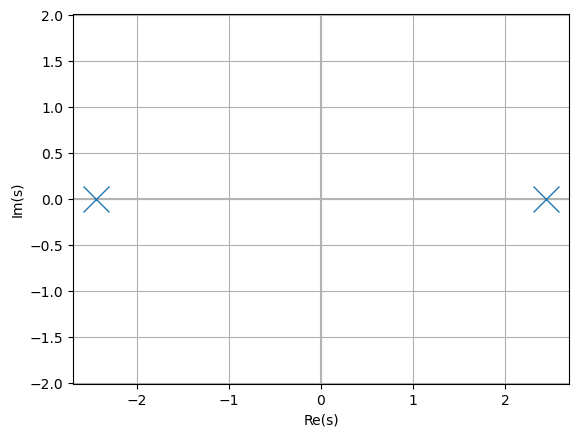

In [4]:
H.plot()

There is a pole at $\sqrt(6)$ which is on the RHP so we will get exponential growth.

In [5]:
F=H*1/s
ft=F(t)
ft
# The equation is:

   ⎛ √6⋅t        -√6⋅t⎞     
   ⎜ℯ       1   ℯ     ⎟     
14⋅⎜───── - ─ + ──────⎟⋅u(t)
   ⎝  12    6     12  ⎠     

You did not have to find the equation, you just had to say exponential growth.  

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

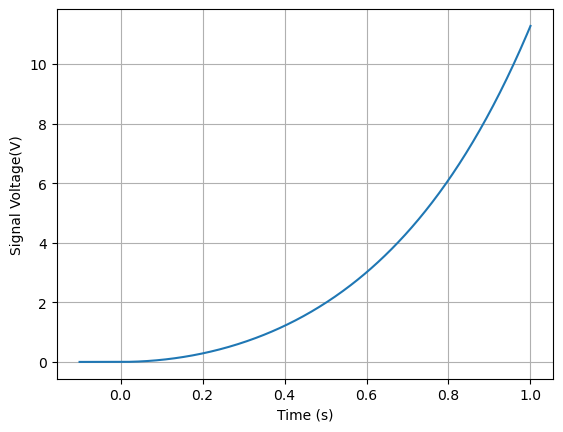

In [6]:
tv = linspace(-.1, 1, 400)
ft.plot(tv,ylabel='Signal Voltage(V)')

We can see the exponential growth clearly.

Below is the block diagram of Q(s):

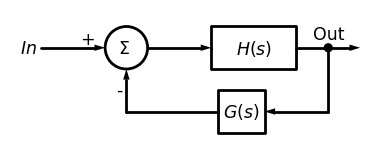

In [7]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()

In [8]:
from sympy import Symbol
#Keep G a symbol for now.
K1=Symbol('K1')
K2=Symbol('K2')
G = Symbol('G')
N=14
D=s**2-6
Q=N/(D+G*N)
Q.general()

      14     
─────────────
        2    
14⋅G + s  - 6

We need to as a $bs$ term and change $-6$ into a positive term. We need a $K_1s$ term that modifies 14 into a $bs$ term.  We need a $K_2$ term that modifies 14 into a positive term when summed with -6.

$$G(s)=K_1s+K_2$$

In [9]:
Q=Q.subs(G,K1*s+K2)
Q

           14           
────────────────────────
                   2    
14⋅K₁⋅s + 14⋅K₂ + s  - 6

To make $14 K_1 $ positve $K_1>0$

To make $14 K_2- 6$ positive $K_2>\frac{6}{14}$
For example $K_2=1.43$, $K_1=0.5$

In [10]:
Q=Q.subs(K1,.5)
Q=Q.subs(K2,1.43)
Q

      14      
──────────────
 2         701
s  + 7⋅s + ───
            50

In [11]:
Q.poles()

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

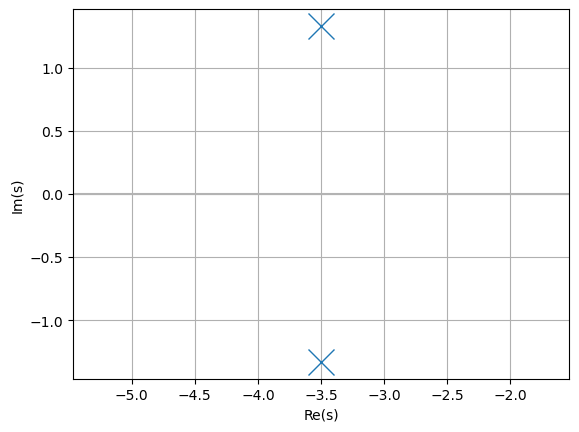

In [12]:
Q.plot()

We can see the poles are now on the RHP.

In [13]:
Fq=Q*1/s
qt=Fq(t,causal=True)
qt

   ⎛                                       -7⋅t                    -7⋅t       
   ⎜                                       ─────                   ─────      
   ⎜                                         2      ⎛√177⋅t⎞         2      ⎛√
   ⎜                            1750⋅√177⋅ℯ     ⋅sin⎜──────⎟   50⋅ℯ     ⋅cos⎜─
   ⎜            1                                   ⎝  10  ⎠                ⎝ 
14⋅⎜───────────────────────── - ──────────────────────────── - ───────────────
   ⎜⎛7   √177⋅ⅉ⎞ ⎛7   √177⋅ⅉ⎞              124077                       701   
   ⎜⎜─ - ──────⎟⋅⎜─ + ──────⎟                                                 
   ⎝⎝2     10  ⎠ ⎝2     10  ⎠                                                 

      ⎞     
      ⎟     
177⋅t⎞⎟     
─────⎟⎟     
 10  ⎠⎟     
──────⎟⋅u(t)
      ⎟     
      ⎟     
      ⎠     

All the terms now have exponential decay.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

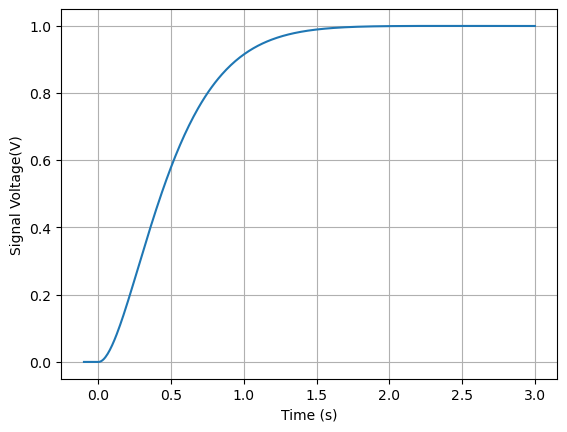

In [14]:
tv = linspace(-.1, 3, 400)
qt.plot(tv,ylabel='Signal Voltage(V)')